In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()

index_word = dict([(value, key) for (key, value) in word_index.items()] )

news = ' '.join([str(i) for i in train_data[0]])

news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])

# 분리 분리
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=31)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

print(train_data[0])

550378/550378 [==============================] - 0s 0us/step
6736
2246
2246
46
[1, 6040, 6950, 4, 599, 3674, 9069, 1629, 483, 7, 104, 8, 16, 23, 2, 233, 25, 220, 161, 16, 330, 129, 1104, 812, 742, 4, 910, 1629, 27, 443, 640, 34, 2, 493, 599, 3674, 1022, 9, 34, 1161, 28, 2, 31, 488, 305, 6891, 9, 2, 16, 64, 10, 718, 1995, 5, 69, 119, 18, 2, 6040, 6950, 34, 9401, 9, 2560, 27, 9664, 71, 2832, 3468, 8856, 1022, 10, 8856, 176, 8, 271, 1022, 23, 6040, 2, 1546, 3156, 51, 36, 487, 6, 7861, 4, 513, 5, 222, 2844, 6141, 6474, 6398, 2, 8, 4, 2, 60, 4262, 25, 1275, 5, 291, 92, 109, 5, 4, 2, 645, 2393, 3272, 712, 17, 12]


In [3]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i,d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)


# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
train_labels = utils.to_categorical(train_labels)
val_labels = utils.to_categorical(val_labels)
test_labels = utils.to_categorical(test_labels)

In [4]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from keras.layers import BatchNormalization, Activation, Dropout

model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [6]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

model.save('reuters')
check_point_rt = callbacks.ModelCheckpoint('reuters.h5',save_best_only=True)
early_stopping_rt = callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, train_labels, epochs=30, validation_data = (x_val, val_labels), callbacks=[check_point_rt, early_stopping_rt])


INFO:tensorflow:Assets written to: reuters\assets
Epoch 1/30
211/211 [==============================] - 6s 14ms/step - loss: 1.6966 - accuracy: 0.6542 - val_loss: 1.3636 - val_accuracy: 0.7284
Epoch 2/30
211/211 [==============================] - 3s 14ms/step - loss: 0.8747 - accuracy: 0.8094 - val_loss: 0.9293 - val_accuracy: 0.7925
Epoch 3/30
211/211 [==============================] - 3s 13ms/step - loss: 0.5941 - accuracy: 0.8695 - val_loss: 0.9377 - val_accuracy: 0.7841
Epoch 4/30
211/211 [==============================] - 3s 12ms/step - loss: 0.4318 - accuracy: 0.9004 - val_loss: 0.9554 - val_accuracy: 0.8059
Epoch 5/30
211/211 [==============================] - 3s 13ms/step - loss: 0.3627 - accuracy: 0.9179 - val_loss: 0.9720 - val_accuracy: 0.8045


C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_2356\1201330491.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


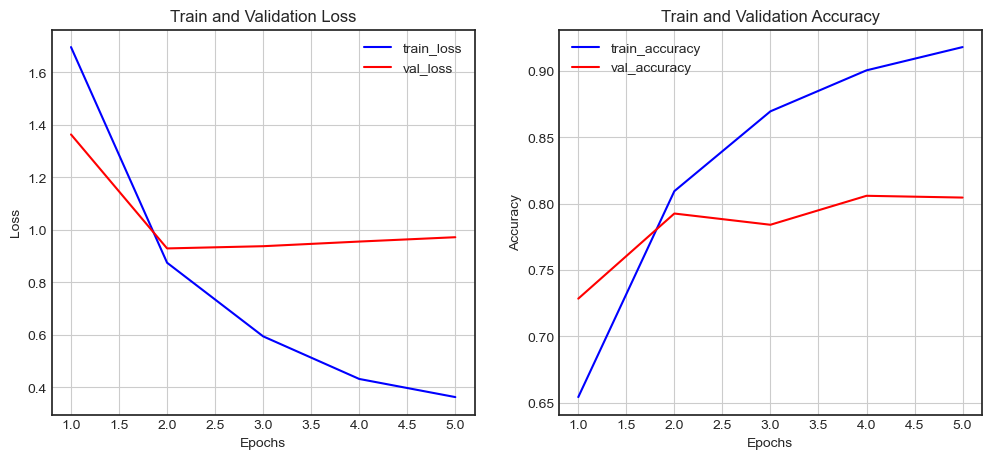

In [7]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
eval_rt = model.evaluate(x_test, test_labels)

71/71 [==============================] - 1s 7ms/step - loss: 1.0136 - accuracy: 0.7747
